## Taller 3 - Modelos de aprendizaje en python
Carlos Gomez - 202111593
<br>
Jeronimo Vargas - 202113305
<br>

In [1]:
# Importar Librerias y datos
import pandas as pd
data = pd.read_csv('real_estate_valuation_data_set.csv', index_col=0)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
data.shape 

(414, 7)

### Estadisticas Descriptivas

In [3]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Pre-procesamiento

In [4]:
# Preprocesamiento de datos
data.isnull().sum()
# Numero y Eliminar duplicado 
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [5]:
data.shape

(414, 7)

### Analisis exploratorio

In [6]:
import seaborn as sns
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

c:\Users\Jeronimo Vargas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


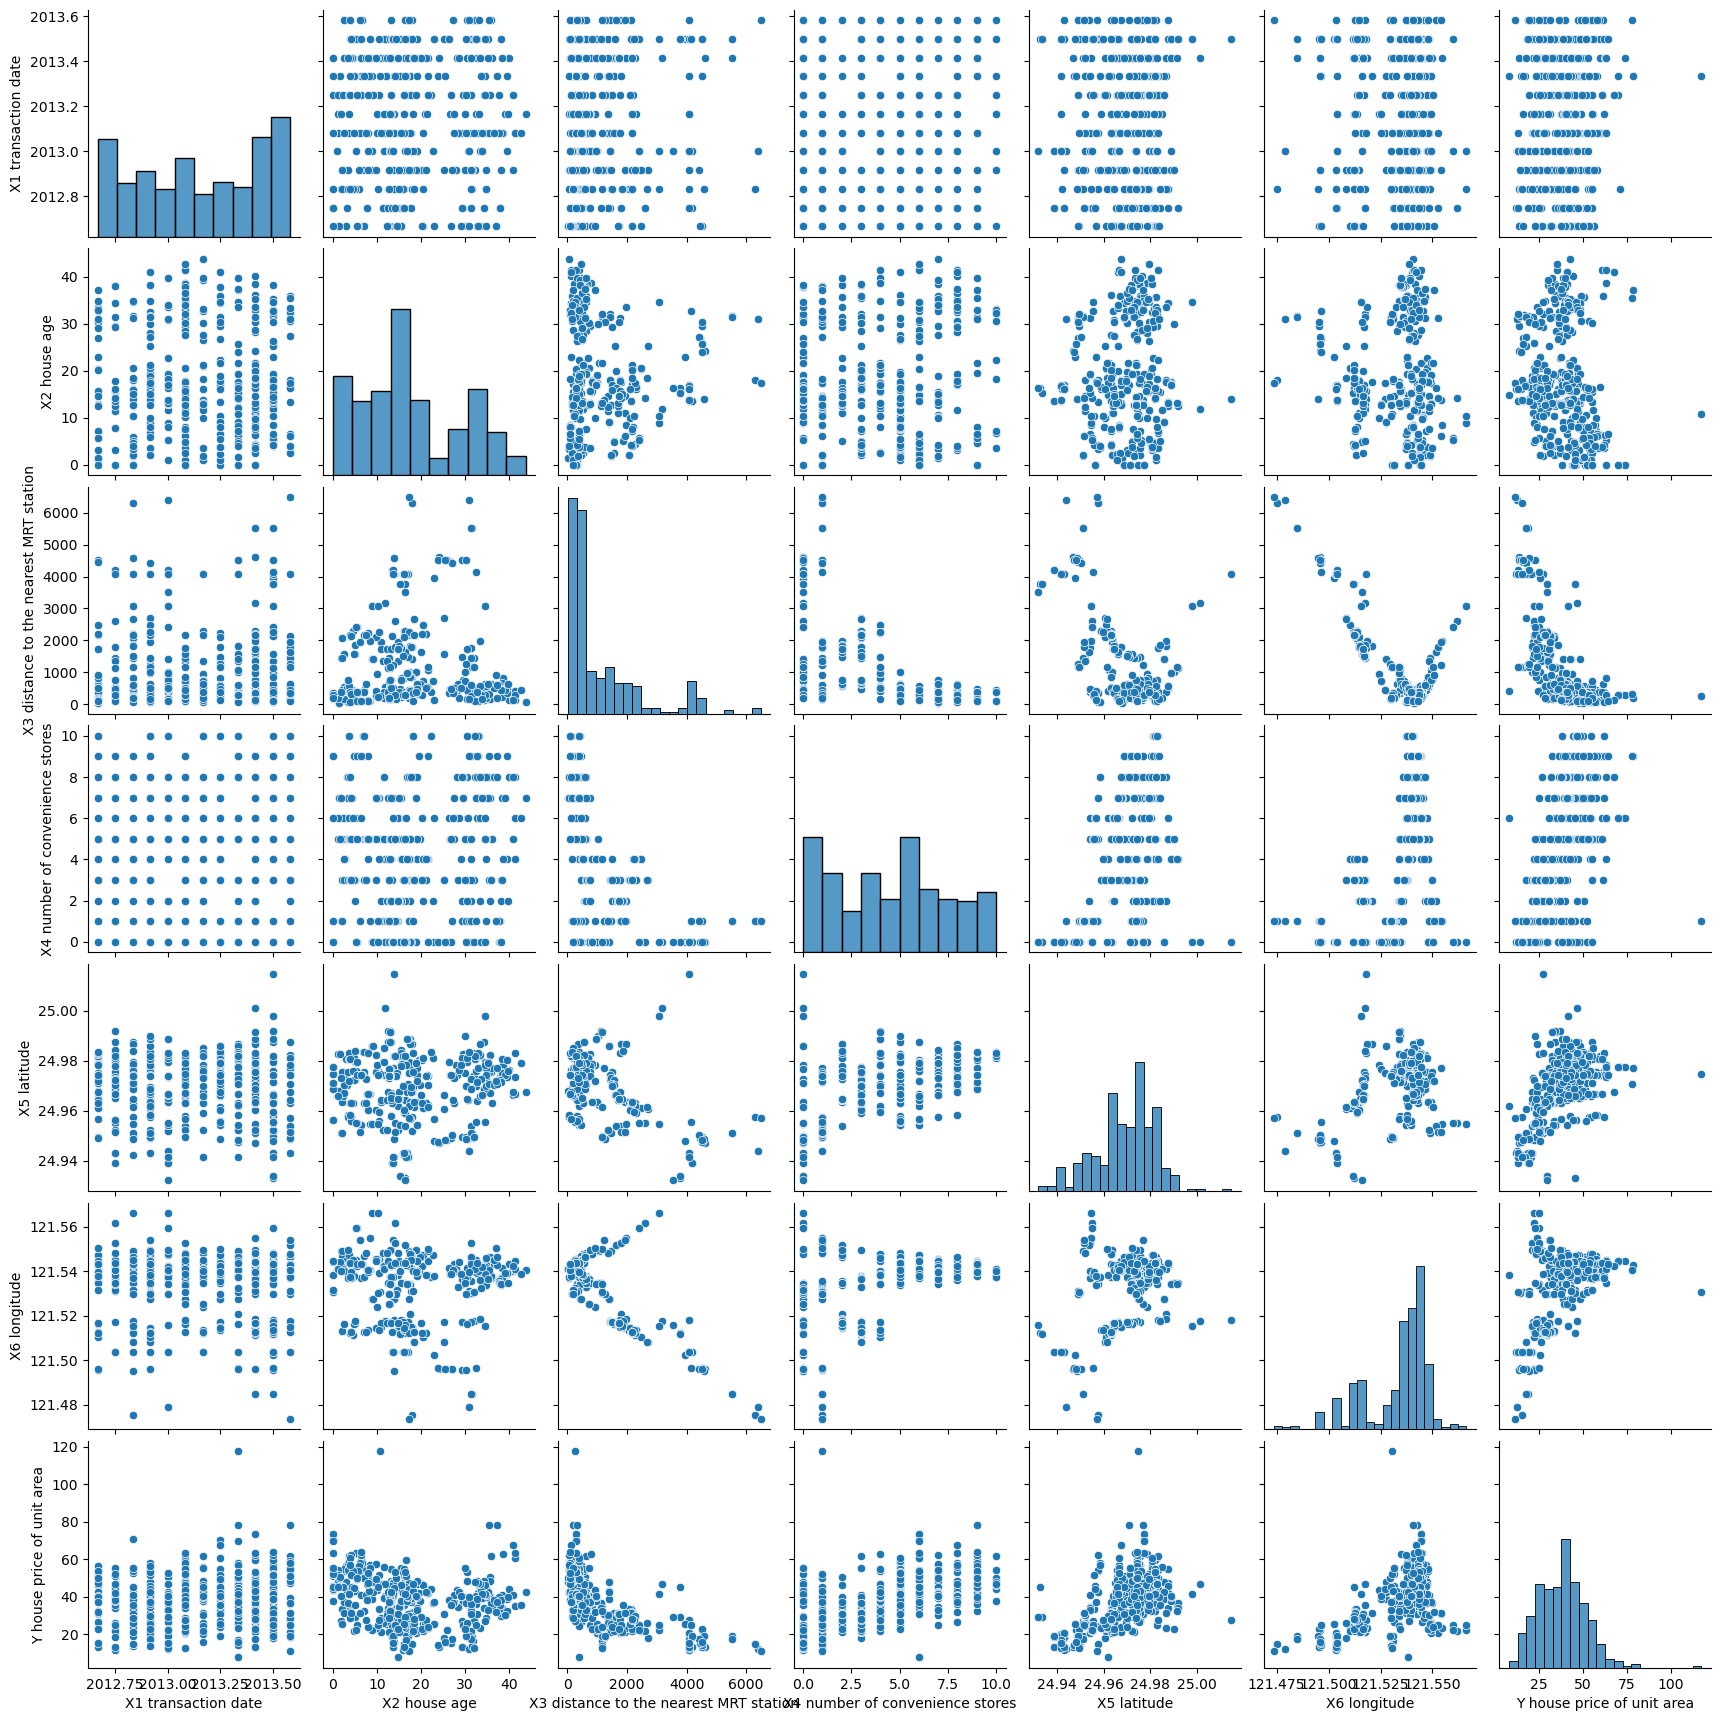

In [7]:
sns.pairplot(data)

### Matriz de correlación

<Axes: >

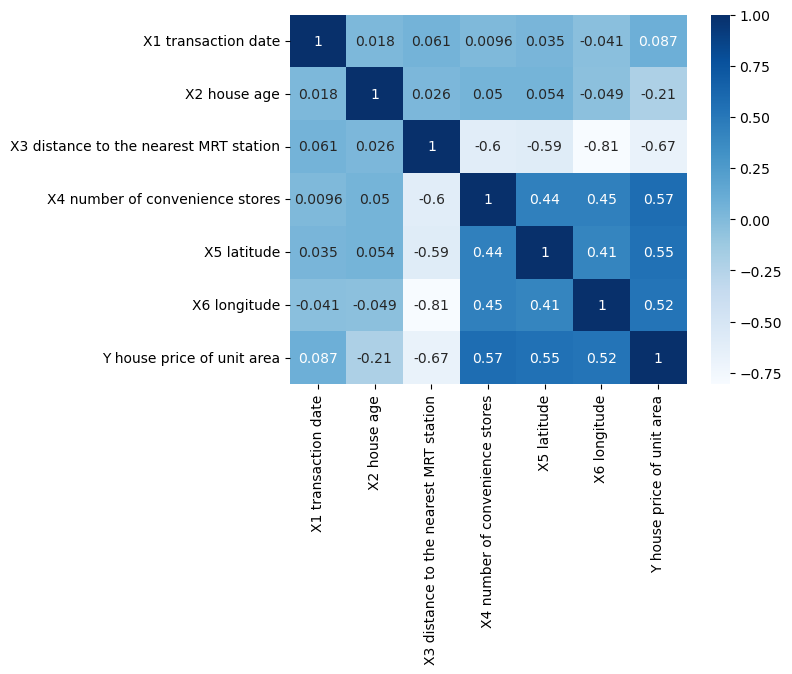

In [8]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

<Axes: >

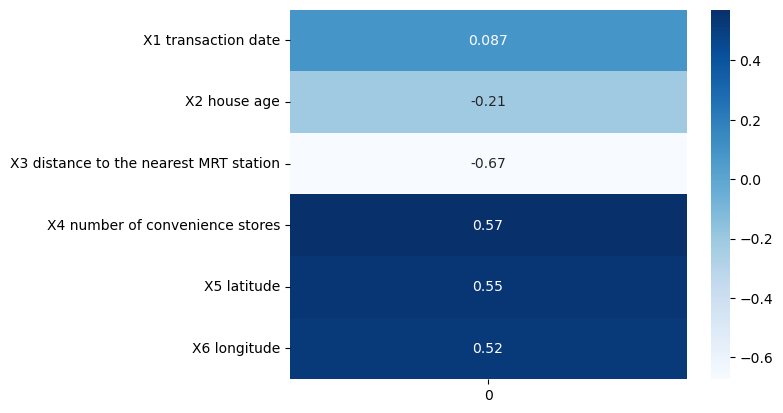

In [9]:
corrw = data.drop(['Y house price of unit area'], axis=1).corrwith(data['Y house price of unit area'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

c:\Users\Jeronimo Vargas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


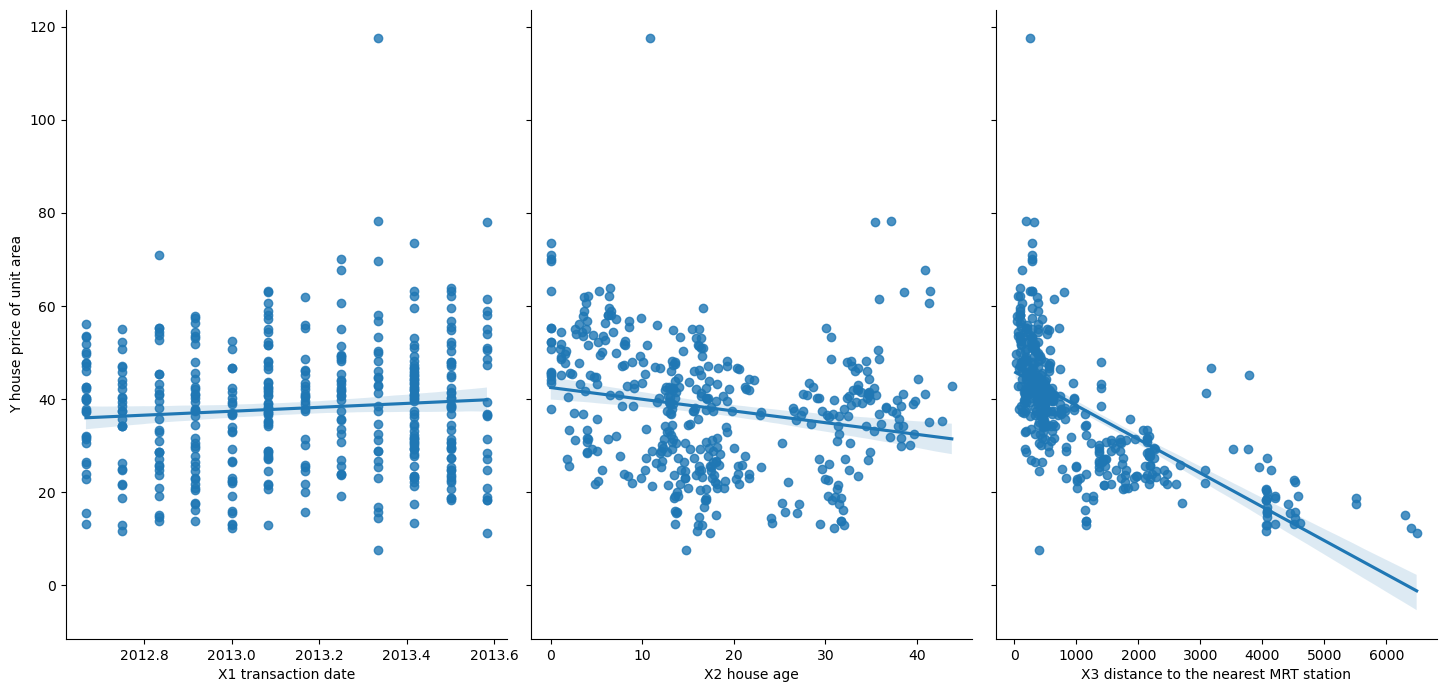

In [10]:
sns.pairplot(data, x_vars=['X1 transaction date' ,'X2 house age' ,'X3 distance to the nearest MRT station'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

c:\Users\Jeronimo Vargas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


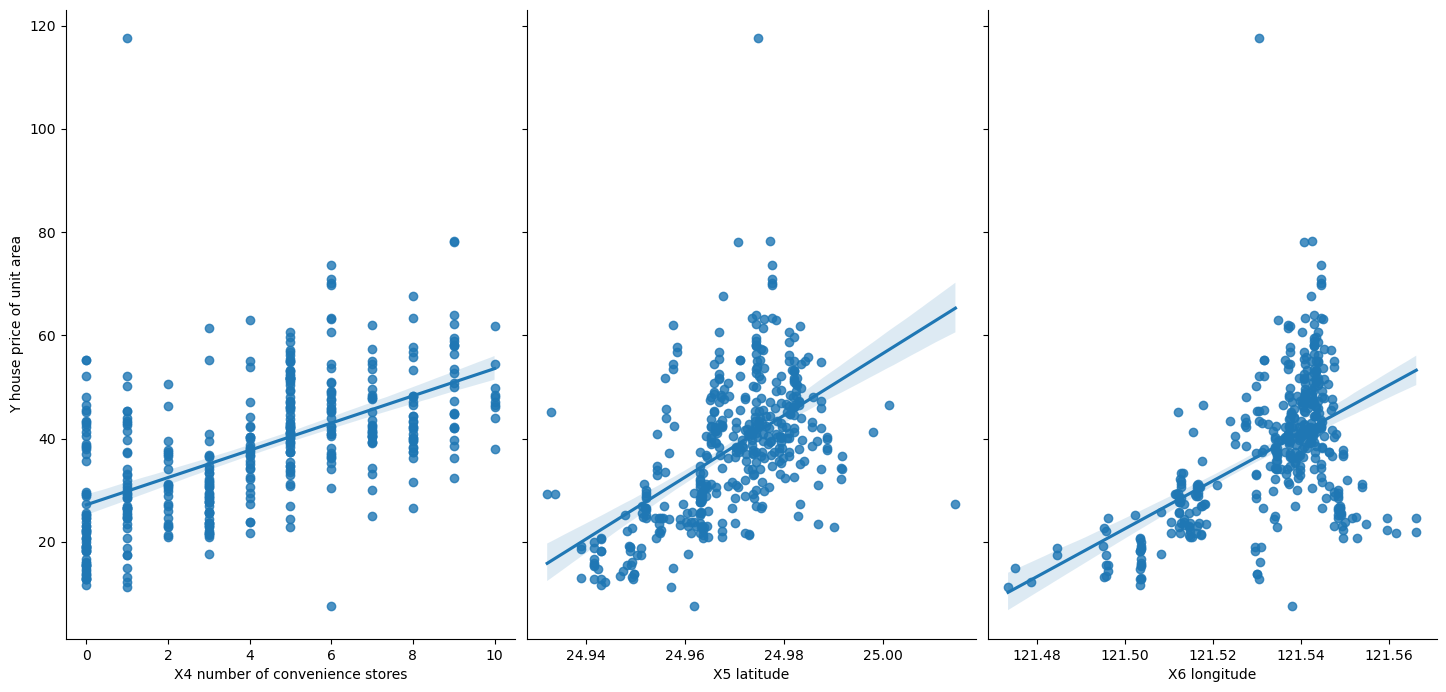

In [11]:
sns.pairplot(data, x_vars=['X4 number of convenience stores','X5 latitude' ,'X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{X1} + \beta_2 \times \text{X2} + \beta_3 \times \text{X3} + \beta_4 \times \text{X4} + \beta_5 \times \text{X5} + \beta_6 \times \text{X6} $

In [12]:
# Variables
for i in data.columns.values:
    print(i)

X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


In [13]:
variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

x = data[variables]
y = data['Y house price of unit area']

x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [14]:
y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

### División entre entrenamiento y prueba

In [15]:
import sklearn.model_selection as train_test_split
x_train, x_test, y_train, y_test = train_test_split.train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
# Tamaños
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


### Regresion Lineal

In [17]:
# Modelo RL
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Imprimir coeficientes
print("B0:", model.intercept_)
indice = 1
for i in model.coef_:
    feature = variables[indice-1]  
    print(f"B{indice} ({feature}):", i)
    indice += 1

B0: -12796.117684899318
B1 (X1 transaction date): 5.717142183610287
B2 (X2 house age): -0.24932646689585244
B3 (X3 distance to the nearest MRT station): -0.004937698432023019
B4 (X4 number of convenience stores): 1.076145093445308
B5 (X5 latitude): 227.03710037116494
B6 (X6 longitude): -35.6988334650508


### Predicciones datos de prueba

In [19]:
y_pred = model.predict(x_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [20]:
# Evaluar el modelo
import numpy as np
import sklearn.metrics as metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 5.343030944662901
Mean Squared Error (MSE): 45.01050719519399
Root Mean Squared Error (RMSE): 6.708987046879282
R2: 0.7034608498767342


### Validacion cruzada

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [22]:
# Calcular RMSE 
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

# RMSE promedio
print(rmse_scores.mean())

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]
8.693434260346606


### Statsmodels

In [23]:
# Satsmodel
from sklearn import model_selection
import statsmodels.api as sm

variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

x = data[variables]
y = data['Y house price of unit area']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)

x = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.948
Model:                                    OLS   Adj. R-squared (uncentered):              0.947
Method:                         Least Squares   F-statistic:                              933.0
Date:                        Sun, 25 Aug 2024   Prob (F-statistic):                   1.70e-192
Time:                                21:44:21   Log-Likelihood:                         -1129.8
No. Observations:                         310   AIC:                                      2272.
Df Residuals:                             304   BIC:                                      2294.
Df Model:                                   6                                                  
Covariance Type:                    nonrobust                                                  
                                        

### Determinar la influencia de las observaciones

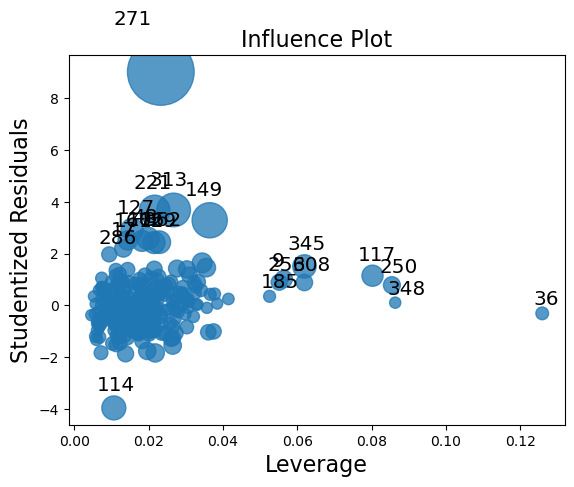

In [24]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [25]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = x_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(x_train.index[out_d], "\n", model_cooksd[out_d])



Umbral con distancia de Cook: 0.012903225806451613
Index([313, 271, 106, 362, 345, 129, 48, 114, 117, 195, 221, 149, 167, 127,
       383],
      dtype='int64', name='No') 
 [0.0597555  0.25542764 0.01891979 0.02289995 0.02490666 0.02122092
 0.02212518 0.02676595 0.01917204 0.01302387 0.04765958 0.06600505
 0.01512473 0.02205864 0.01595271]


In [26]:
x_train.shape

(310, 6)

In [27]:
x_train[out_d]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
313,2013.583,35.4,318.5292,9,24.97071,121.54069
271,2013.333,10.8,252.5822,1,24.97460,121.53046
106,2012.833,0.0,292.9978,6,24.97744,121.54458
362,2013.083,41.4,281.2050,8,24.97345,121.54093
345,2013.500,34.6,3085.1700,0,24.99800,121.51550
129,2013.083,41.3,124.9912,6,24.96674,121.54039
48,2013.583,35.9,640.7391,3,24.97563,121.53715
114,2013.333,14.8,393.2606,6,24.96172,121.53812
117,2013.000,30.9,6396.2830,1,24.94375,121.47883


In [28]:
y_train[out_d]

No
313     78.0
271    117.5
106     71.0
362     63.3
345     41.2
129     60.7
48      61.5
114      7.6
117     12.2
195     29.3
221     78.3
149     45.1
167     73.6
127     62.9
383     29.3
Name: Y house price of unit area, dtype: float64